Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
sns.set()

Функция `column_info` показывает информацию по столбцу.

In [3]:
def column_info(data, column, quantitative=False, mean=True, median=True, hist=True, bins=50):    
    lost = data[column].isna().sum() #смотрим количество пропусков
    total = data.shape[0] #длина всех значений переменной
    print()
    print('*** Информация по столбцу {} ***'.format(column))
    print()
    print('Тип данных столбца {}: {}:'.format(column, data[column].dtype))
    print('В столбце {} пропущено {} из {} строк, что составляет {:.2%}'
          .format(column, lost, total, lost / total)) #считаем процент пропусков
    if quantitative:        
        print('Минимальное значение: {:.2f}'.format(data[column].min()))
        print('Максимальное значение: {:.2f}'.format(data[column].max()))
        if mean:
            print('Среднее значение: {:.2f}'.format(data[column].mean()))
        if median:
            print('Медианное значение: {:.2f}'.format(data[column].median()))
        if hist:
            gridsize = (5, 1)
            fig = plt.figure(figsize=(15, 5))
            ax1 = plt.subplot2grid(gridsize, (0, 0))
            ax2 = plt.subplot2grid(gridsize, (1, 0), rowspan=4)                       
            sns.boxplot(data[column], ax=ax1)            
            sns.distplot(data[column], kde=False, bins=bins, ax=ax2)            
            ax1.get_xaxis().set_visible(False)            
            plt.show()                        
    else:
        print()
        print('Количество значений в каждой из категорий:')
        print(data[column].value_counts())        
    print()

In [4]:
query_1 = pd.read_csv('/datasets/query_1.csv')

query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Данные великолепны. Разве что самолётов мало.

In [6]:
query_3 = pd.read_csv('/datasets/query_3.csv')

query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
query_3.sample(n=10, random_state=21)

,city,average_flights
21,Иваново,1.000000
85,Урай,2.000000
62,Пенза,4.000000
31,Комсомольск-на-Амуре,1.000000
64,Петрозаводск,5.870968
45,Надым,2.290323
46,Нальчик,3.000000
67,Ростов-на-Дону,10.193548
47,Нарьян-Мар,2.612903
36,Кызыл,1.277778


Тут тоже всё в порядке с данными.

In [8]:
query_3['city'].isna().sum()

0

Пропусков нет.

In [9]:
query_3['average_flights'] = query_3['average_flights'].astype('float16')


*** Информация по столбцу average_flights ***

Тип данных столбца average_flights: float16:
В столбце average_flights пропущено 0 из 101 строк, что составляет 0.00%
Минимальное значение: 1.00
Максимальное значение: 129.75
Среднее значение: 5.50
Медианное значение: 3.00


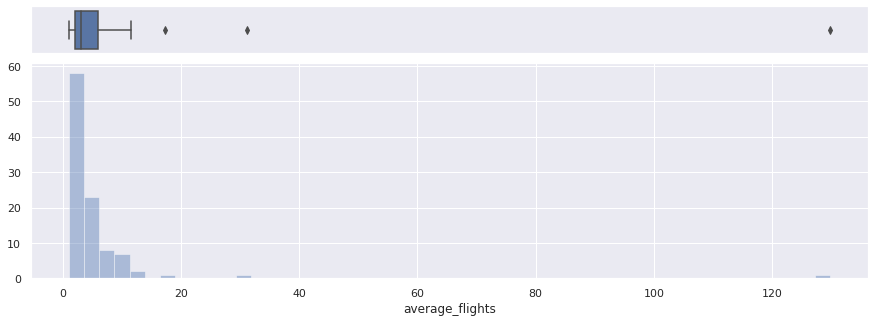

In [10]:
column_info(query_3, 'average_flights', quantitative=True)

На лицо имеются заметные выбросы. Знаем мы эти выброшенные города.

In [11]:
top10_city = query_3.sort_values('average_flights', ascending=False).head(10)

In [12]:
top10_city

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


**Вывод** Вот эти города. Здесь представлены города с наибольшим населением, а также город-курорт Сочи. Что в этом списке делает Брянск - не понятно.

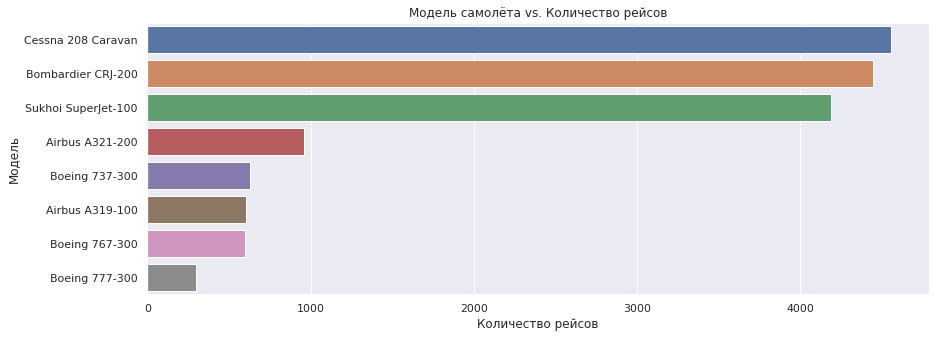

In [13]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
sns.barplot(x="flights_amount", y="model", data=query_1.sort_values('flights_amount', ascending=False), ax=ax)
ax.set_title('Модель самолёта vs. Количество рейсов')
ax.set_xlabel('Количество рейсов')
ax.set_ylabel('Модель')
plt.show()

**Вывод** Количество рейсов обратно пропорционально вместимости самолётов: Чаще всего летают региональные самолёты, реже всего - широкофизюляжные. Звучит логично.

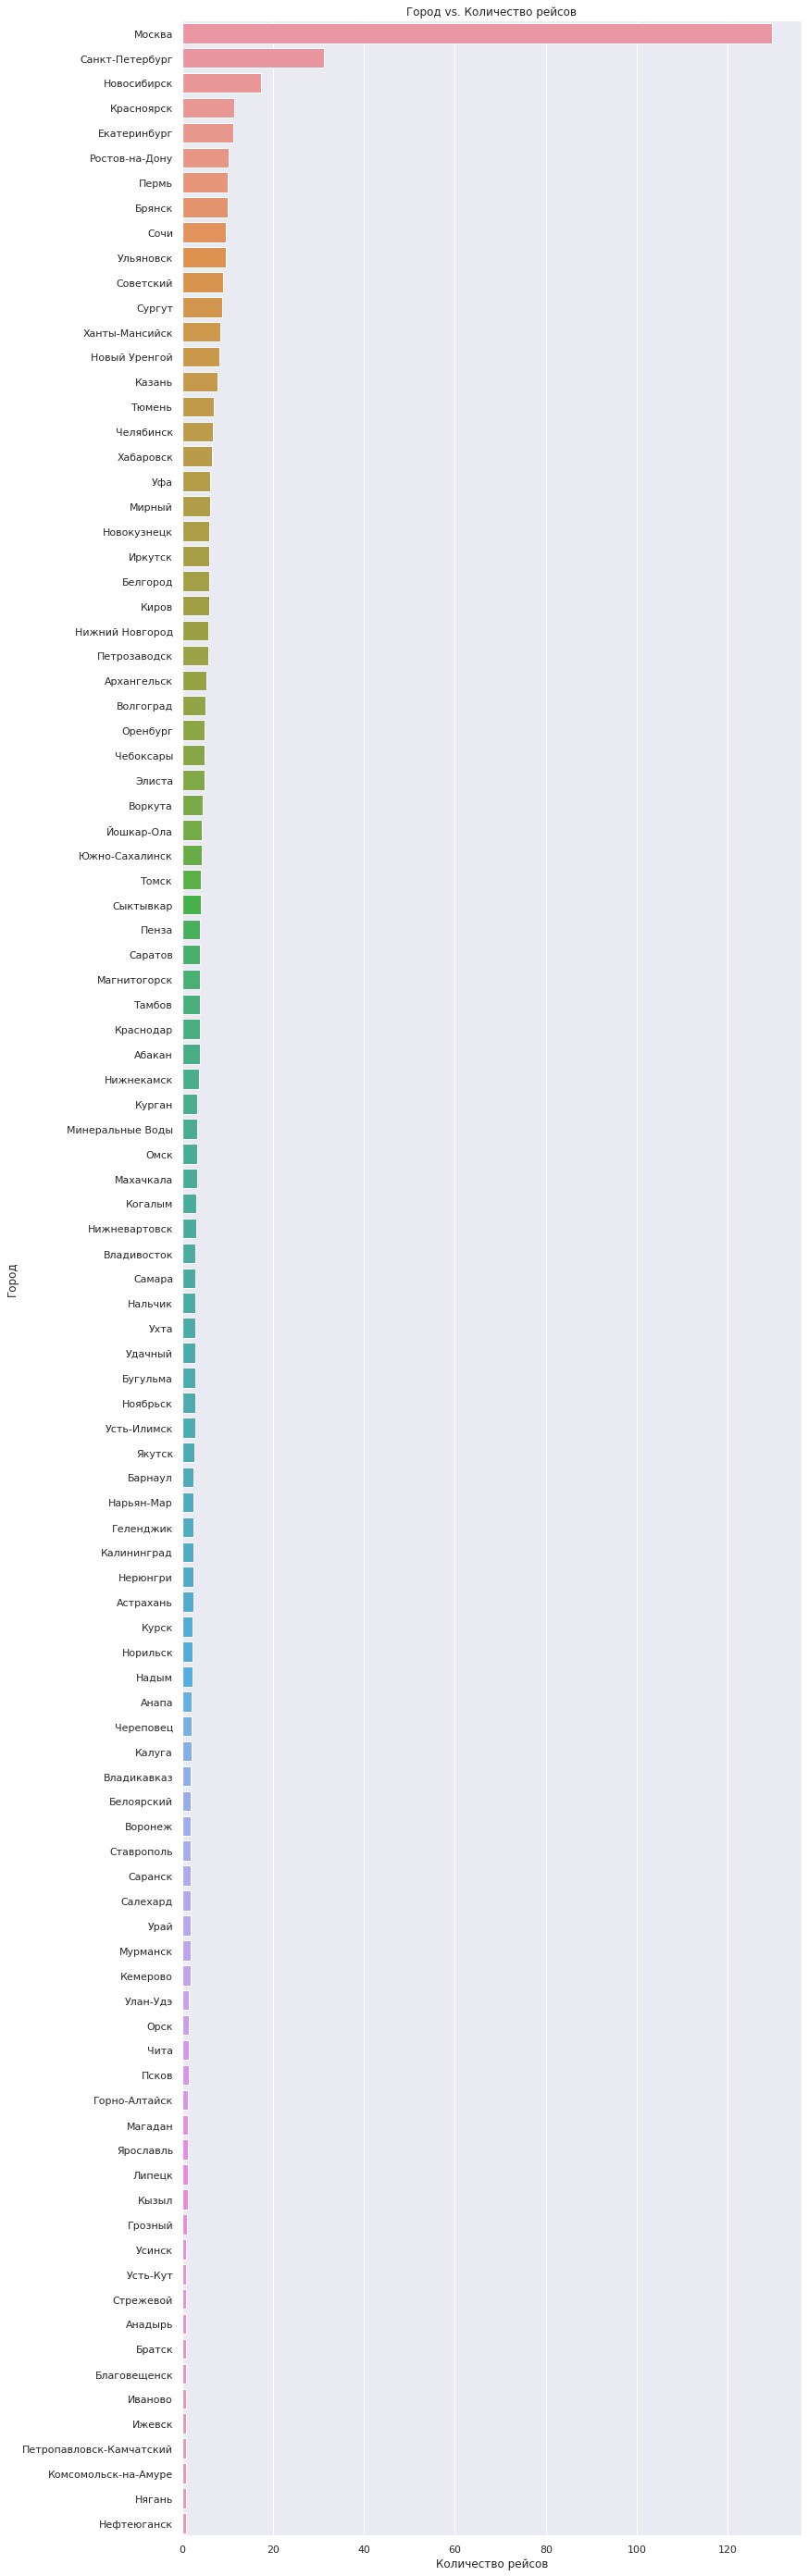

In [14]:
fig = plt.figure(figsize=(12, 50))
ax = fig.add_subplot()
sns.barplot(x="average_flights", y="city", data=query_3.sort_values('average_flights', ascending=False), ax=ax)
ax.set_title('Город vs. Количество рейсов')
ax.set_xlabel('Количество рейсов')
ax.set_ylabel('Город')
plt.show()

**Вывод** Москва конечно абсолютный чемпион не только по бюджету на блогоустройство (больше, чем на всю остальную Россию), но и по количеству рейсов. Тот факт, что Москва является основным транспортным хабом (из Магадана в Якутск только через Москву), существенно добавляет количество рейсов.

Надо выбирать какое-то небольшое их количество, либо, например, сопоставить население и количество рейсов. А если использовать в качестве оси Ох категориальную переменную с более чем 100 пунктов, то получится неинформативный лапоть.

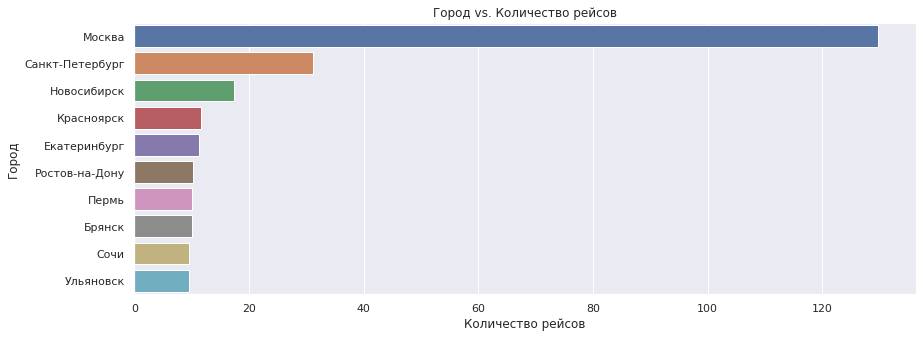

In [15]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
sns.barplot(x="average_flights", y="city", data=top10_city, ax=ax)
ax.set_title('Город vs. Количество рейсов')
ax.set_xlabel('Количество рейсов')
ax.set_ylabel('Город')
plt.show()

# 2. Проверка гипотезы

In [16]:
query_last = pd.read_csv('/datasets/query_last.csv')

query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [17]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Не самый большой ДФ. Возникает вопрос, конечно, насколько корректно проводить статистические тесты для столь маленькой выборки.

Поделим эту маленькую выборку на ещё две поменьше: в одной - недели с фестивалями, в другой - без них.

In [18]:
query_last_with_fest = query_last[query_last.festival_week.notna()]
query_last_without_fest = query_last[query_last.festival_week.isna()]

In [19]:
print('Среднее в недели фестивалей {:.2f}'.format(query_last_with_fest['ticket_amount'].mean()))

Среднее в недели фестивалей 48662.67


In [20]:
print('Среднее в обычное время фестивалей {:.2f}'.format(query_last_without_fest['ticket_amount'].mean()))

Среднее в обычное время фестивалей 51530.86


H0 уже сформулирована: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». H1, альтернативная гипотеза, что средние отличаются. Учитывая среднее значение, вычисленное выше, можно предположить, что спрос в обычное время даже выше.

Возьмём alpha = 0.01.

Используем mannwhitneyu. Выборка небольшая и не распределена нормально..

In [21]:
results = st.mannwhitneyu(query_last_with_fest.ticket_amount, query_last_without_fest.ticket_amount)

print('p-значение: ', results.pvalue)

p-значение:  0.03412374418900064


Так как alpha < p-значения H0 принимаем. Т.е. средние статистически не отличаются.

# 3. Общий вывод

Странный проект. Почему бы не сделать большую выборку по другим городам, или расширить время.

Если говорить о бизнес-выводах: То авиакомпаниям и аэропортам не стоит напрягаться по время фестивалей. По крайней мере в Москве. Видимо, это капля в море.

Чем меньше вместительность самолёта, тем чаще он используется. Так чаще всего летает Cessna 208, а широкофизюляжный Boeing-777 леатет на порядок реже. Вообще хорошим тоном считается, чтобы самолёт проводил большую часть времени в воздухе. Региональные самолёты летают на небольшие дистанции, это занимает меньше времени, поэтому они могут совершать рейсы чаще.

Количество рейсов прямо коррелирует с населением города, так Москва находится на 1-м месте(130), Санкт-Петербург 2-е место(31), Новосибирск 3-е место(17).

Проведение фестивалей не влияет на загруженность авиасообщений. Количество колеблется около 51 000 билетов. Это, конечно, применимо только к Москве в определённый период. Не думаю, что такой же вывод можно сделать относительно полуторамиллионного Мюнхена с его октоберфестом. 